Instructions:
1. Choose a unique dataset from: https://archive.ics.uci.edu
2. Your dataset should be unique from your classmates otherwise no points will be given for this exercise.
### Complete the Tasks in bold

## Data Exploration

**TASK: Create a correlation heatmap.**

**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: Do not forget to put a random_state for reproducibility.*

**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

Data Exploration

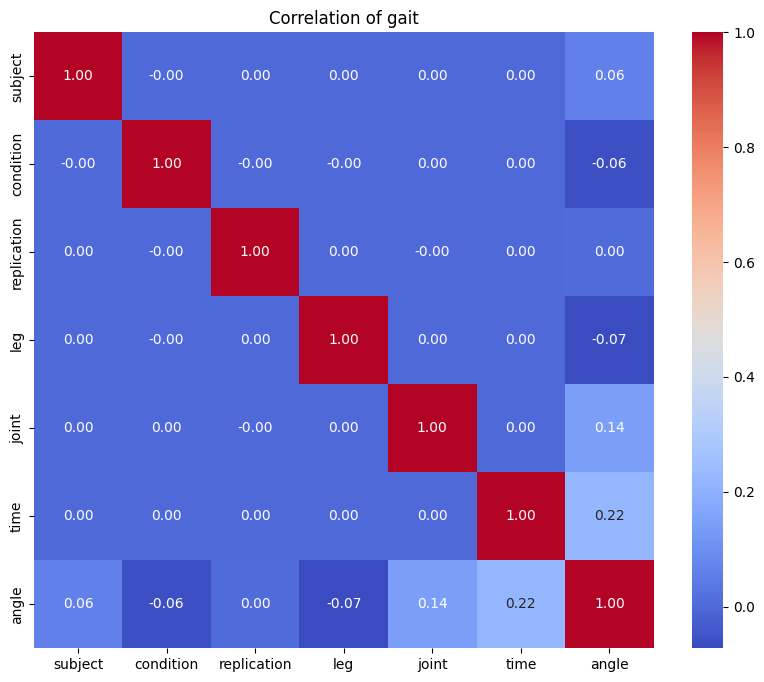

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

utrecht_houses = pd.read_csv("gait.csv")
numeric_columns = utrecht_houses.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of gait')
plt.show()

In [9]:
numeric_columns = utrecht_houses.select_dtypes(include=['int64', 'float64'])

utrecht_houses['Mapped_Label'] = utrecht_houses['y-coor'].apply(lambda x: 1 if x > utrecht_houses['y-coor'].mean() else 0)

correlations = numeric_columns.corrwith(utrecht_houses['Mapped_Label'].abs()).abs().sort_values(ascending=False)

correlations = correlations.drop('Mapped_Label')

top_correlations = correlations.head(5)

print("Top 5 correlated frequencies with the target label:")
print(top_correlations)

KeyError: 'y-coor'